# Geospatial Operations: Spatial Joins, Geometric Manipulations, and Geocoding

## Package Installation

In [ ]:
!sudo apt-get update -y

Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)


In [ ]:
!sudo apt-get install -y libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 114 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (467 kB/s)
debconf: unable to initialize frontend: Dialog
de

In [ ]:
!pip install geopandas geopy mapclassify rtree

     |████████████████████████████████| 972kB 4.2MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 
     |████████████████████████████████| 10.9MB 47.6MB/s 
  Created wheel for rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21768 sha256=2a805f47b4413f7c2f86a12cdd85d99958465701b9549e205552bfd1b9871565
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built rtree


In [ ]:
# !pip install -q --upgrade ipython
# !pip install -q --upgrade ipykernel

In [ ]:
import os
import requests
import pandas as pd
import geopandas as gpd

In [ ]:
def download_data(url, save_as, save_dir, extract = False):
    '''
    Download a file using a direct download url and extract if a .zip file.

    Parameters
    ----------
    - url (str): direct download url for file of interest
    - save_as (str): name that the file should be saved as
    - save_dir (str): directory where the file should be saved
    - extract (bool): default, False - boolean to extract contents of .zip

    Returns
    -------
    File downloaded, saved, and extracted (if applies) in desired save directory.
    '''
    assert type(save_dir) == str
    assert type(save_as) == str
    assert type(extract) == bool
    assert type(url) == str

    if '/' != save_dir[0]:
        save_dir = '/' + save_dir

    if '.' not in save_dir:
        save_dir = '.' + save_dir
        
    os.makedirs('{}'.format(save_dir), exist_ok=True)

    r = requests.get(url)

    with open(os.path.join(save_dir, save_as),'wb') as f: 
        f.write(r.content)

    if extract:
        if '.zip' in save_as:
            os.system('unzip {} -d {}'.format(os.path.join(save_dir, save_as), save_dir))
        else:
            print('This file is not a .zip file. Please set the `extract` argument to False.')


# Geocoding

### Data

In [ ]:
chicago_hospitals_url = 'https://data.cityofchicago.org/download/ucpz-2r55/application%2Fzip'
download_data(chicago_hospitals_url, 'chicago_hospitals.zip', 'chicago/hospitals', True)



# Geometric Manipulations

### Data

Download Chicago Community Area Boundary JSON

In [ ]:
chicago_comm_area_url = 'https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON'
download_data(chicago_comm_area_url, 'community_areas.json', 'chicago')

Read Using `geopandas` and set the CRS to NAD83 Illinois East (EPSG = 3528).

In [ ]:
comm_areas = gpd.read_file('./chicago/community_areas.json', driver='GeoJSON')
comm_areas = comm_areas.to_crs(epsg = 3528)

Plot Chicago's Community Areas

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((360144.247 575106.337, 360143...."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((361581.719 572034.768, 361568...."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((358550.672 570339.105, 358551...."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((360372.479 572011.602, 360372...."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((361581.719 572034.768, 361582...."


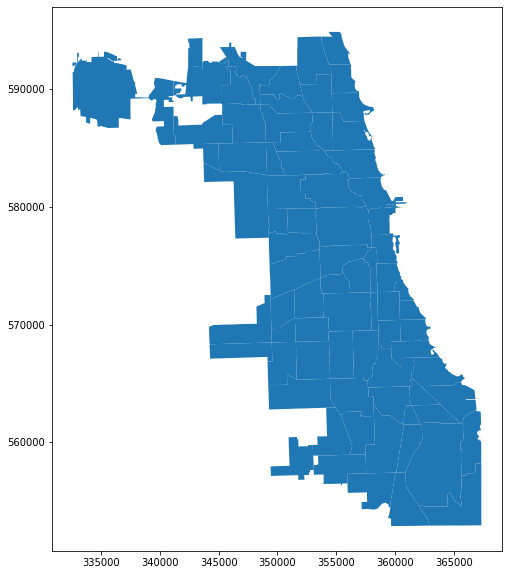

In [ ]:
comm_areas.plot(figsize=(10, 10))
comm_areas.head()

Download Chicago Library data.

In [ ]:
chicago_libraries_url = 'https://data.cityofchicago.org/api/views/x8fc-8rcq/rows.csv?accessType=DOWNLOAD'
download_data(chicago_libraries_url, 'chicago_libraries.csv', 'chicago/libraries')

Read in Chicago Libraries using `geopandas`.

In [ ]:
libraries = gpd.read_file('./chicago/libraries/chicago_libraries.csv')
libraries.head()

,NAME,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry
0,Vodak-East Side,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",3710 E. 106th St.,Chicago,IL,60617,(312) 747-5281,https://www.chipublib.org/locations/71/,"(41.70302747819179, -87.53350318470449)",None
1,Albany Park,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.975456, -87.71409)",None
2,Avalon,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",8148 S. Stony Island Ave.,Chicago,IL,60617,(312) 747-5234,https://www.chipublib.org/locations/8/,"(41.74671722160199, -87.58539658719002)",None
3,Brainerd,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",1350 W. 89th St.,Chicago,IL,60620,(312) 747-6291,https://www.chipublib.org/locations/13/,"(41.732316757097045, -87.65723451581835)",None
4,Popular Library at Water Works,"Mon. - Thu., 9-7; Fri. & Sat., 9-5; Sun., 1-5",163 E. Pearson St.,Chicago,IL,60611,(312) 742-8811,https://www.chipublib.org/locations/73/,"(41.89758435399726, -87.62314877110073)",None


Create libraries geometry data using the **LOCATION** column. First, we create separate **X** and **Y** columns.

In [ ]:
libraries['X'] = libraries.LOCATION.apply(lambda x: float(x.replace(')', '').split(',')[1]))
libraries['Y'] = libraries.LOCATION.apply(lambda x: float(x.replace('(', '').split(',')[0]))
libraries.head()

,NAME,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry,X,Y
0,Vodak-East Side,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",3710 E. 106th St.,Chicago,IL,60617,(312) 747-5281,https://www.chipublib.org/locations/71/,"(41.70302747819179, -87.53350318470449)",None,-87.533503,41.703027
1,Albany Park,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.975456, -87.71409)",None,-87.714090,41.975456
2,Avalon,"Sun., Closed; Mon. & Wed., Noon-8; Tue. & Thu....",8148 S. Stony Island Ave.,Chicago,IL,60617,(312) 747-5234,https://www.chipublib.org/locations/8/,"(41.74671722160199, -87.58539658719002)",None,-87.585397,41.746717
3,Brainerd,"Sun., Closed; Mon. & Wed., 10-6; Tue. & Thu., ...",1350 W. 89th St.,Chicago,IL,60620,(312) 747-6291,https://www.chipublib.org/locations/13/,"(41.732316757097045, -87.65723451581835)",None,-87.657235,41.732317
4,Popular Library at Water Works,"Mon. - Thu., 9-7; Fri. & Sat., 9-5; Sun., 1-5",163 E. Pearson St.,Chicago,IL,60611,(312) 742-8811,https://www.chipublib.org/locations/73/,"(41.89758435399726, -87.62314877110073)",None,-87.623149,41.897584


Next, we will use the newly created **X** and **Y** columns to create our geometry. Don't forget to set and change the CRS!

In [ ]:
libraries.geometry = gpd.points_from_xy(x = libraries.X, y = libraries.Y)
libraries.crs = {'init':'epsg:4326'}
libraries = libraries.to_crs(epsg = 3528)

/home/vidal/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Plot Chicago's libraries onto community areas.

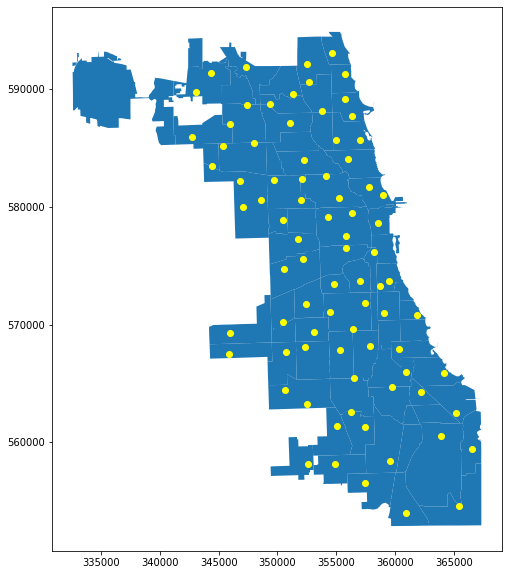

In [ ]:
libraries.plot(color = 'yellow', ax = comm_areas.plot(figsize = (10, 10)))

### Buffers

Creating buffers of points.

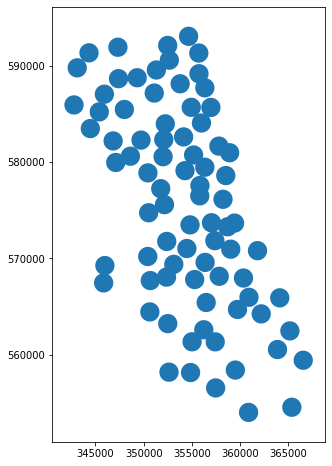

In [ ]:
libraries.buffer(1000).plot(figsize = (8, 8))

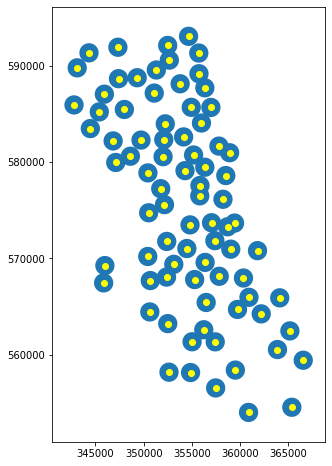

In [ ]:
libraries.plot(color = 'yellow', ax = libraries.buffer(1000).plot(figsize = (8, 8)))

Creating buffers of polygons.

In [ ]:
hyde_park = comm_areas[comm_areas['community'] == 'HYDE PARK']

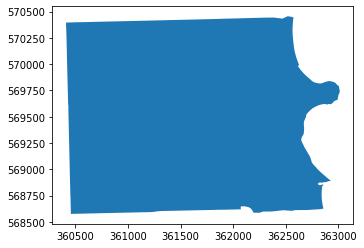

In [ ]:
hyde_park.plot()

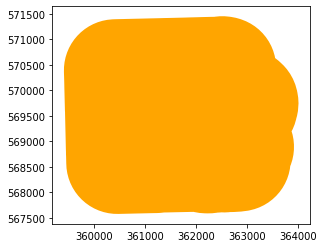

In [ ]:
hyde_park.buffer(1000).plot(color = 'orange')

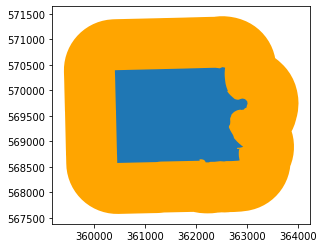

In [ ]:
hyde_park.plot(ax=hyde_park.buffer(1000).plot(color = 'orange'))

### Boundaries and Centroids

Boundaries of polygons.

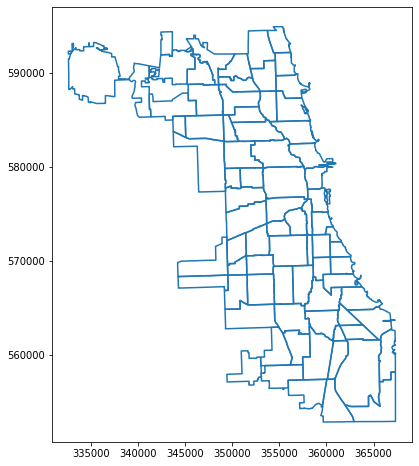

In [ ]:
comm_areas.boundary.plot(figsize = (8, 8))

Centroids of polygons.

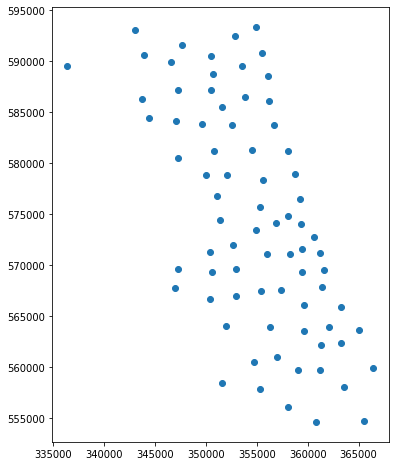

In [ ]:
comm_areas.centroid.plot(figsize = (8, 8))

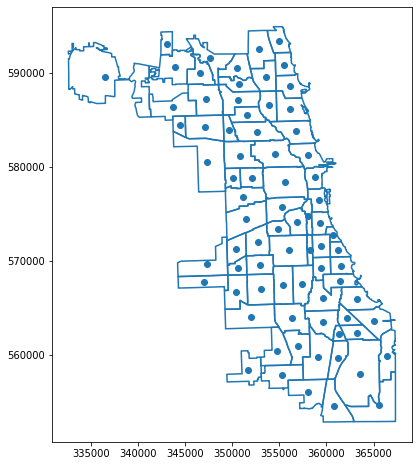

In [ ]:
comm_areas.centroid.plot(ax = comm_areas.boundary.plot(figsize = (8, 8)))

### Envelopes, Convex Hulls, and Simplifications

Envelopes

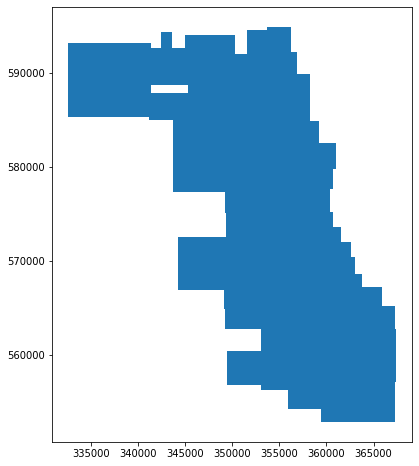

In [ ]:
comm_areas.envelope.plot(figsize=(8, 8))

Let's see the boundaries of the envelopes to see what's going on.

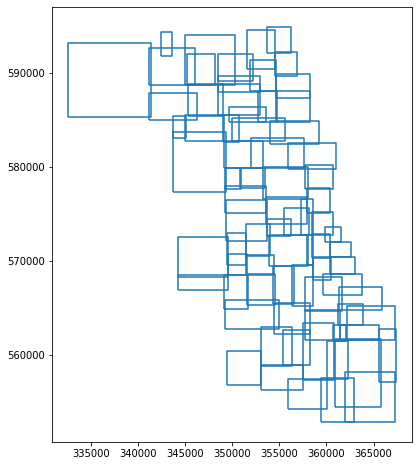

In [ ]:
comm_areas.envelope.boundary.plot(figsize=(8, 8))

Convex Hulls
Learn more about Convex Hulls [here](https://brilliant.org/wiki/convex-hull/).

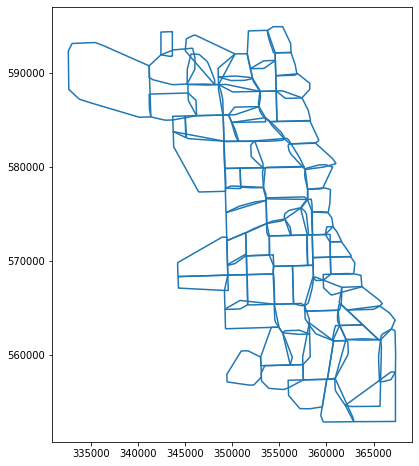

In [ ]:
comm_areas.convex_hull.boundary.plot(figsize = (8, 8))

Simplifications

In [ ]:
ohare = comm_areas[comm_areas['community'] == 'OHARE']

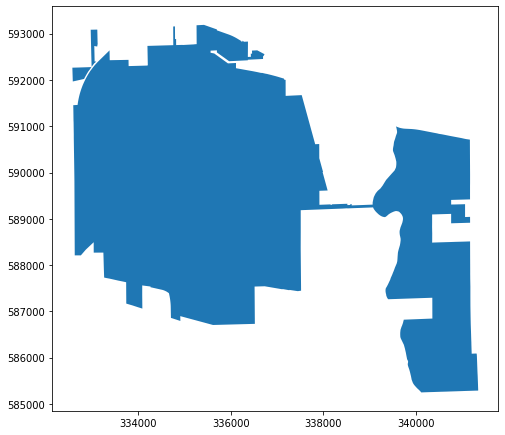

In [ ]:
ohare.plot(figsize = (8, 8))

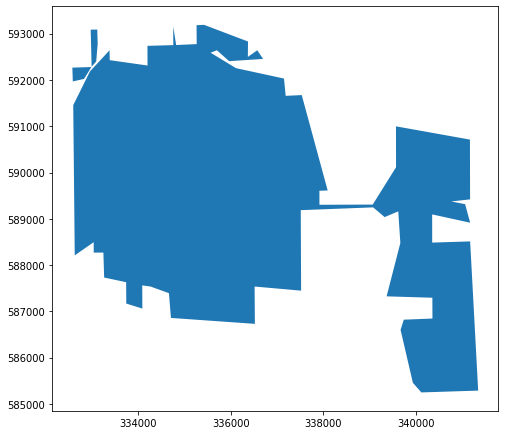

In [ ]:
ohare.simplify(tolerance=100).plot(figsize = (8, 8))

### Exercise: Plot a 1 Mile Radius Around Each Library Over Chicago's Community Areas

In [ ]:
#[REPLACE BRACKETED TEXT WITH THE RIGHT CODE].plot(color = 'yellow', 
                               alpha = .5, 
                               ax = comm_areas.plot(figsize = (10, 10)))

### Exercise: Plot a 1 x 1 Mile Bounding Box Around Each Library Over Chicago's Community Areas

In [ ]:
#[REPLACE BRACKETED TEXT WITH THE RIGHT CODE].plot(color = 'yellow', 
                                                 alpha = .5, 
                                                 ax = comm_areas.plot(figsize = (10, 10)))

# Spatial Joins

### Data

Download Chicago Population by block data.

In [ ]:
chicago_pop_blocks_url = 'https://data.cityofchicago.org/api/views/5yjb-v3mj/rows.csv?accessType=DOWNLOAD'
download_data(chicago_pop_blocks_url, 'chicago_pop_blocks.csv', 'chicago/population')
chicago_blocks_url = 'https://data.cityofchicago.org/api/geospatial/mfzt-js4n?method=export&format=GeoJSON'
download_data(chicago_blocks_url, 'blocks.json', '/chicago')

Read Chicago Population by block data.

In [ ]:
block_pop = pd.read_csv('./chicago/population/chicago_pop_blocks.csv')
block_pop['CENSUS BLOCK FULL'] = block_pop['CENSUS BLOCK FULL'].astype(str)
block_pop.head()

,CENSUS BLOCK,CENSUS BLOCK FULL,TOTAL POPULATION
0,310003002,170310310003002,104
1,310003003,170310310003003,46
2,310003004,170310310003004,40
3,310003005,170310310003005,58
4,310003006,170310310003006,75


In [ ]:
blocks = gpd.read_file('./chicago/blocks.json', driver = 'GeoJSON')
blocks = blocks.to_crs(epsg = 3528)
blocks.geoid10 = blocks.geoid10.astype(str)

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((358558.100 566695.132, 358559...."
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((358133.343 567289.247, 358134...."
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((358073.804 567085.164, 358043...."
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((349397.194 576627.546, 349396...."
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((349918.541 576146.118, 349911...."


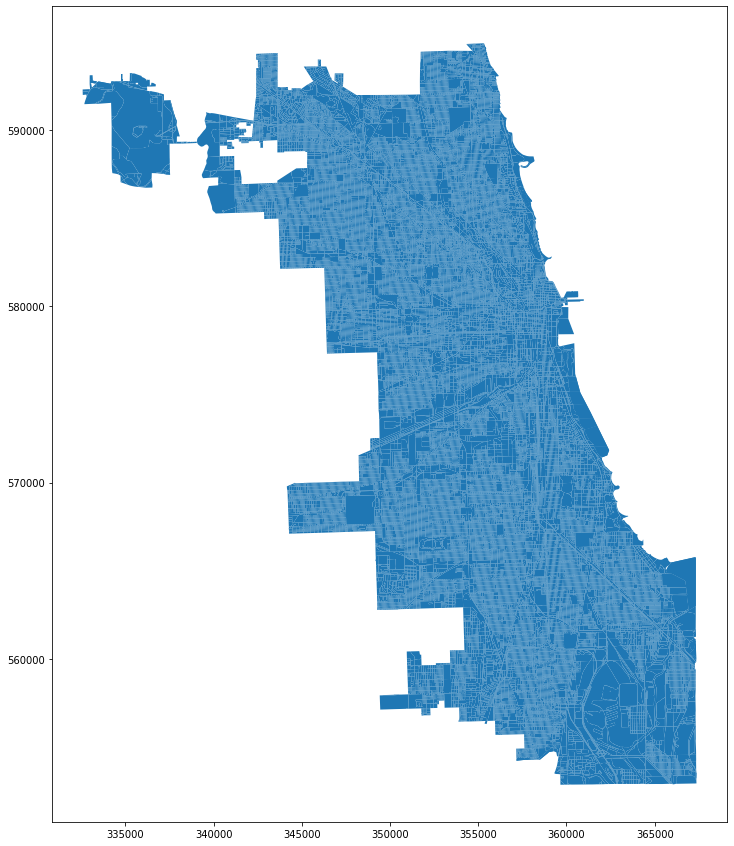

In [ ]:
blocks.plot(figsize=(15,15))
blocks.head()

In [ ]:
blocks_w_pop = blocks.merge(block_pop, left_on = 'geoid10', right_on = 'CENSUS BLOCK FULL', how = 'left')

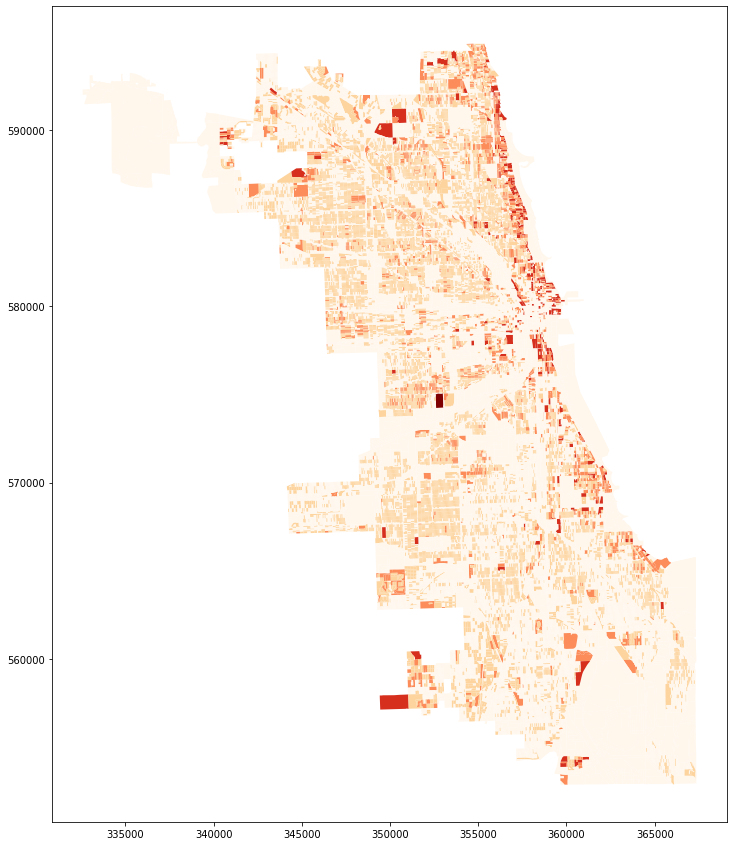

In [ ]:
blocks_w_pop.plot(column='TOTAL POPULATION', cmap='OrRd', figsize = (15, 15), scheme='natural_breaks')

### Intersects, Within, and Contains

Common Use Case: Subsetting Geometries - Blocks in Hyde Park

In [ ]:
# import os
# import requests
# import pandas as pd
# import geopandas as gpd

In [ ]:
# comm_areas = gpd.read_file('./chicago/community_areas.json', driver='GeoJSON')
# comm_areas = comm_areas.to_crs(epsg = 3528)
# hyde_park = comm_areas[comm_areas['community'] == 'HYDE PARK']

# block_pop = pd.read_csv('./chicago/population/chicago_pop_blocks.csv')
# block_pop['CENSUS BLOCK FULL'] = block_pop['CENSUS BLOCK FULL'].astype(str)

# blocks = gpd.read_file('./chicago/blocks.json', driver = 'GeoJSON')
# blocks = blocks.to_crs(epsg = 3528)
# blocks.geoid10 = blocks.geoid10.astype(str)

# blocks_w_pop = blocks.merge(block_pop, left_on = 'geoid10', right_on = 'CENSUS BLOCK FULL', how = 'left')

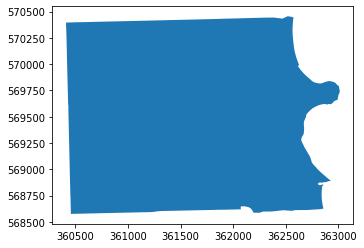

In [ ]:
hyde_park.plot()

In [ ]:
# hyde_park_blocks_intersect = gpd.sjoin(blocks_w_pop, hyde_park, op = 'intersects', how = 'inner')[['statefp10', 'name10', 'blockce10', 'tract_bloc', 'geoid10', 'geometry', 'community', 'TOTAL POPULATION']]
# print(hyde_park_blocks_intersect.shape)
# hyde_park_blocks_intersect.head()

(283, 8)


,statefp10,name10,blockce10,tract_bloc,geoid10,geometry,community,TOTAL POPULATION
103,17,Block 1010,1010,4106001010,170314106001010,"MULTIPOLYGON (((361225.364 570091.056, 361226....",HYDE PARK,72.0
310,17,Block 2007,2007,4101002007,170314101002007,"MULTIPOLYGON (((362104.115 570419.207, 362073....",HYDE PARK,333.0
803,17,Block 1000,1000,4110001000,170314110001000,"MULTIPOLYGON (((362610.939 569431.943, 362610....",HYDE PARK,0.0
805,17,Block 3005,3005,4109003005,170314109003005,"MULTIPOLYGON (((362490.953 570120.564, 362502....",HYDE PARK,0.0
807,17,Block 3012,3012,4110003012,170314110003012,"MULTIPOLYGON (((362444.103 569347.176, 362444....",HYDE PARK,0.0


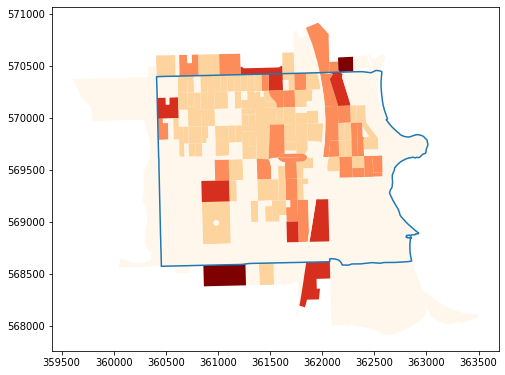

In [ ]:
# hyde_park_blocks_intersect.plot(column='TOTAL POPULATION',
#                                 cmap = 'OrRd', 
#                                 scheme = 'natural_breaks', 
#                                 ax = hyde_park.boundary.plot(figsize = (8, 8)))

In [ ]:
# hyde_park_blocks_within = gpd.sjoin(blocks_w_pop, hyde_park, op = 'within', how = 'inner')[['statefp10', 'name10', 'blockce10', 'tract_bloc', 'geoid10', 'geometry', 'community', 'TOTAL POPULATION']]
# print(hyde_park_blocks_within.shape)
# hyde_park_blocks_within.head()

(195, 8)


,statefp10,name10,blockce10,tract_bloc,geoid10,geometry,community,TOTAL POPULATION
103,17,Block 1010,1010,4106001010,170314106001010,"MULTIPOLYGON (((361225.364 570091.056, 361226....",HYDE PARK,72.0
805,17,Block 3005,3005,4109003005,170314109003005,"MULTIPOLYGON (((362490.953 570120.564, 362502....",HYDE PARK,0.0
807,17,Block 3012,3012,4110003012,170314110003012,"MULTIPOLYGON (((362444.103 569347.176, 362444....",HYDE PARK,0.0
808,17,Block 3006,3006,4110003006,170314110003006,"MULTIPOLYGON (((362062.647 569423.605, 362061....",HYDE PARK,0.0
842,17,Block 3003,3003,4109003003,170314109003003,"MULTIPOLYGON (((362490.953 570120.564, 362415....",HYDE PARK,0.0


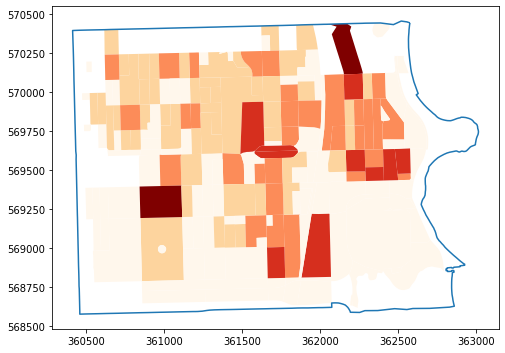

In [ ]:
# hyde_park_blocks_within.plot(column='TOTAL POPULATION', 
#                              cmap = 'OrRd', 
#                              scheme = 'natural_breaks', 
#                              ax = hyde_park.boundary.plot(figsize = (8, 8)))

In [ ]:
# blocks_w_pop_centroids = blocks_w_pop.copy()
# blocks_w_pop_centroids.geometry = blocks_w_pop_centroids.centroid

(244, 21)


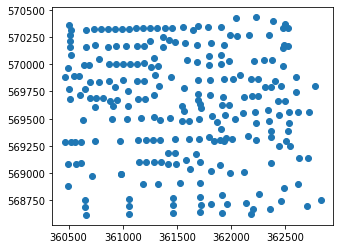

In [ ]:
# hyde_park_blocks_centroids = gpd.sjoin(blocks_w_pop_centroids, hyde_park, op = 'within', how = 'inner')
# print(hyde_park_blocks_centroids.shape)
# hyde_park_blocks_centroids.plot()


In [ ]:
# hyde_park_blocks_centroids = hyde_park_blocks_intersect[hyde_park_blocks_intersect['geoid10'].isin(list(hyde_park_blocks_centroids.geoid10))]
# hyde_park_blocks_centroids.shape

(244, 8)

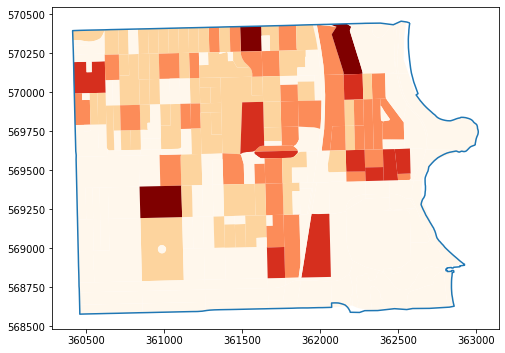

In [ ]:
# hyde_park_blocks_centroids.plot(column='TOTAL POPULATION', 
#                       cmap = 'OrRd', 
#                       scheme = 'natural_breaks', 
#                       ax = hyde_park.boundary.plot(figsize = (8, 8)))

# Bringing It All Together: Analyzing Service Areas of Chicago Public Libraries

### Data

In [ ]:
chicago_socioecon_url = 'https://data.cityofchicago.org/api/views/kn9c-c2s2/rows.csv?accessType=DOWNLOAD'
download_data(chicago_socioecon_url, 'socioecon_indicators.csv', 'chicago/population')

In [ ]:
socioecon = pd.read_csv('./chicago/population/socioecon_indicators.csv')
socioecon.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [ ]:
# blocks_to_comm_area = gpd.sjoin(blocks_w_pop_centroids, comm_areas[['community', 'geometry']], how = 'left', op = 'within')
# blocks_to_comm_area.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry,CENSUS BLOCK,CENSUS BLOCK FULL,TOTAL POPULATION,index_right,community
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,POINT (358528.043 566593.266),6.903002e+09,170316903002010,62.0,66.0,GREATER GRAND CROSSING
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,POINT (358105.052 567185.398),6.809003e+09,170316809003007,15.0,65.0,ENGLEWOOD
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,POINT (357986.115 567131.672),6.809003e+09,170316809003013,104.0,65.0,ENGLEWOOD
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,POINT (349427.187 576704.850),2.909004e+09,170312909004019,3.0,29.0,NORTH LAWNDALE
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,POINT (350003.225 576269.429),2.925004e+09,170312925004016,84.0,29.0,NORTH LAWNDALE


In [ ]:
# pop_by_comm_area = blocks_to_comm_area.groupby('community').sum().drop(columns=['index_right', 'CENSUS BLOCK'])
# pop_by_comm_area.head()

,TOTAL POPULATION
community,
ALBANY PARK,51542.0
ARCHER HEIGHTS,13363.0
ARMOUR SQUARE,13443.0
ASHBURN,41081.0
AUBURN GRESHAM,48743.0


In [ ]:
# comm_areas_w_pop = comm_areas.merge(pop_by_comm_area, left_on='community', right_on='community', how='inner').rename(columns={'TOTAL POPULATION':'total_pop'})
# comm_areas_w_pop.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,total_pop
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((360144.247 575106.337, 360143....",18238.0
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((361581.719 572034.768, 361568....",5918.0
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((358550.672 570339.105, 358551....",2942.0
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((360372.479 572011.602, 360372....",21929.0
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((361581.719 572034.768, 361582....",17841.0


In [ ]:
comm_areas_w_pop_url = 'https://drive.google.com/uc?export=download&id=1vNGsjKXcyJylOsmr5XeYkuEudehJY4DO'
download_data(comm_areas_w_pop_url, 'comm.json', 'chicago')

In [ ]:
comm_areas_w_pop = gpd.read_file('./chicago/comm.json', driver='GeoJSON')
comm_areas_w_pop.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,total_pop,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,18238.0,"MULTIPOLYGON (((360144.247 575106.337, 360143...."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,5918.0,"MULTIPOLYGON (((361581.719 572034.768, 361568...."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,2942.0,"MULTIPOLYGON (((358550.672 570339.105, 358551...."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,21929.0,"MULTIPOLYGON (((360372.479 572011.602, 360372...."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,17841.0,"MULTIPOLYGON (((361581.719 572034.768, 361582...."


### How many communities does the Coleman Library serve that are at least within a .5 mile radius from the library?

### How many different communities does each library serve that are at least within a .5 mile radius from the library?

### Which libraries are accessible from within a mile of the top 3 communities with the highest proportion of the population living below the poverty line?

### Plot the Chicago's community areas with the color being coded by the percent of population over 16 that is unemployed.

### Now Plot the same points from above and all libraries with a .5 mile radius boundary.